In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf # ==2.10
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# pip freeze > requirements.txt

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

In [2]:
data = pd.read_csv('dataset/titanic/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = data[["Pclass", "Sex", 'Survived','SibSp','Parch', 'Age', 'Fare', 'Embarked']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Survived  891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Age       714 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [5]:
data.dropna(subset=['Embarked'], inplace=True) #Удаляем пустые данные

#### Кодируем методом OHE колонки Embarked и Sex

In [6]:
data = pd.get_dummies(data, columns=['Embarked', 'Sex'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Survived    889 non-null    int64  
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Age         712 non-null    float64
 5   Fare        889 non-null    float64
 6   Embarked_Q  889 non-null    bool   
 7   Embarked_S  889 non-null    bool   
 8   Sex_male    889 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 51.2 KB


In [7]:
data.head()

,Pclass,Survived,SibSp,Parch,Age,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,0,1,0,22.0,7.2500,False,True,True
1,1,1,1,0,38.0,71.2833,False,False,False
2,3,1,0,0,26.0,7.9250,False,True,False
3,1,1,1,0,35.0,53.1000,False,True,False
4,3,0,0,0,35.0,8.0500,False,True,True


##### Заполняем пропуски в колонке Age

In [8]:
print(data['Age'].median())
print(data['Age'].mean())

28.0
29.64209269662921


In [9]:
data.loc[data['Age'].isnull(), 'Age'] = data['Age'].median()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Survived    889 non-null    int64  
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Age         889 non-null    float64
 5   Fare        889 non-null    float64
 6   Embarked_Q  889 non-null    bool   
 7   Embarked_S  889 non-null    bool   
 8   Sex_male    889 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 51.2 KB


#### Строим гистограммы для каждой колонки

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Survived'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

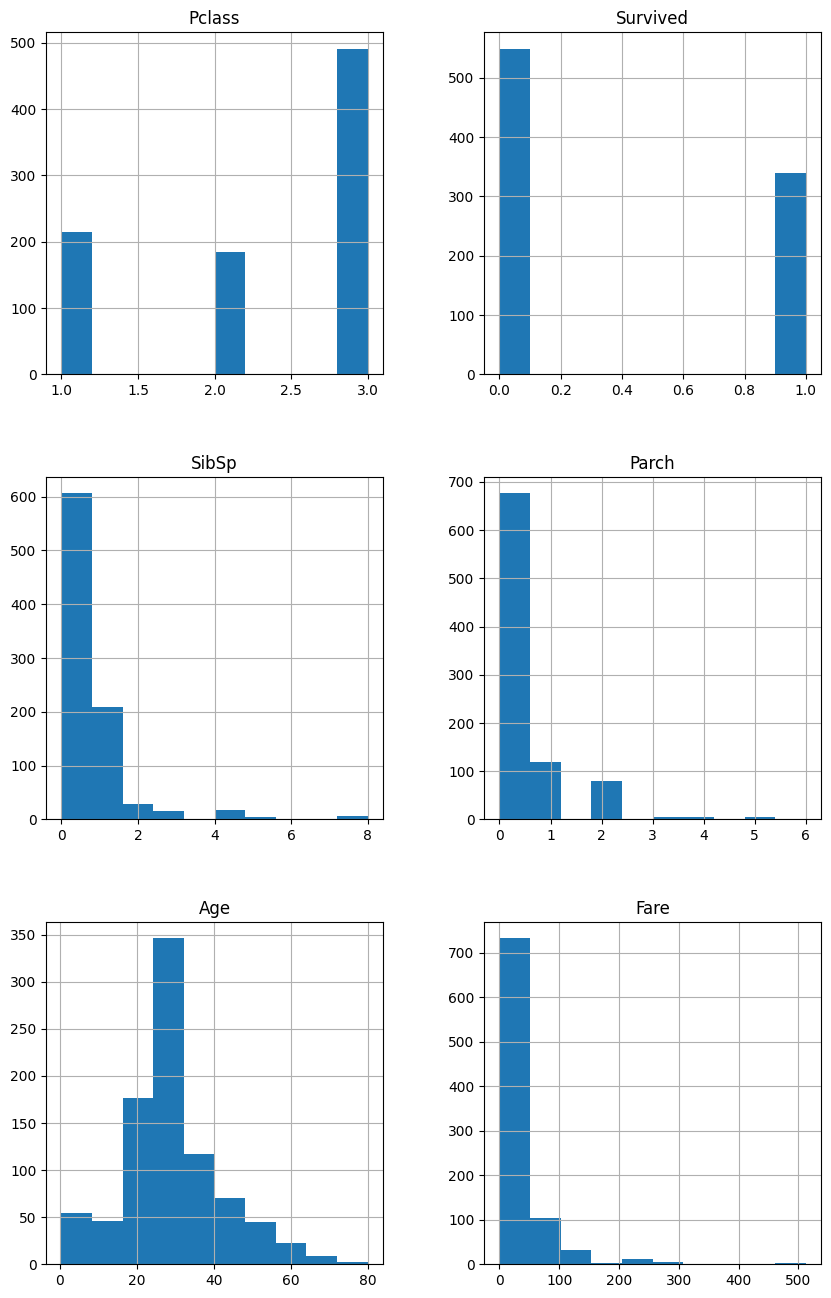

In [10]:
data.hist(figsize=(10,16))

#### Преобразуем данные в необходимый тип

In [11]:
data['Sex_male'] = data['Sex_male'].astype('int8')
data['Survived'] = data['Survived'].astype('int8')
data['Pclass'] = data['Pclass'].astype('int8')
data['SibSp'] = data['SibSp'].astype('int8')
data['Parch'] = data['Parch'].astype('int8')
data['Age'] = data['Age'].astype('int8')

data['Embarked_Q'] = data['Age'].astype('int8')
data['Embarked_S'] = data['Age'].astype('int8')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int8   
 1   Survived    889 non-null    int8   
 2   SibSp       889 non-null    int8   
 3   Parch       889 non-null    int8   
 4   Age         889 non-null    int8   
 5   Fare        889 non-null    float64
 6   Embarked_Q  889 non-null    int8   
 7   Embarked_S  889 non-null    int8   
 8   Sex_male    889 non-null    int8   
dtypes: float64(1), int8(8)
memory usage: 20.8 KB


In [25]:
data['Survived'].value_counts() # Дисбаланс классов

Survived
0    549
1    340
Name: count, dtype: int64

In [12]:
features = data.drop(columns=['Survived'])
target = data['Survived']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

print(features_train.shape)
print(features_test.shape)

(666, 8)
(223, 8)


#### Создаём тестовый алгоритм NAS

<ul>    
    <li>
        <a href ="https://keras.io/api/callbacks/base_callback/">Базовый класс обратного вызова</a>
    </li>
    <li>
        <a href ="https://keras.io/guides/writing_your_own_callbacks/">Написание собственных обратных вызовов</a>
    </li>
</ul>

In [68]:
def visuall (history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+ metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+ metric, 'val_'+ metric])
    plt.show()

In [46]:
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [83]:
model = Sequential()
model.add(Dense(128,input_shape = (features_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=0.0001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['BinaryAccuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               1152      
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dense_57 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


d:\Jupiter\AutoML_with_custom_NAS\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/1000
21/21 - 1s - loss: 2.8606 - binary_accuracy: 0.3679 - val_loss: 1.4305 - val_binary_accuracy: 0.3722 - 549ms/epoch - 26ms/step
Epoch 2/1000
21/21 - 0s - loss: 0.9164 - binary_accuracy: 0.4640 - val_loss: 0.7516 - val_binary_accuracy: 0.6547 - 126ms/epoch - 6ms/step
Epoch 3/1000
21/21 - 0s - loss: 0.6953 - binary_accuracy: 0.6682 - val_loss: 0.7225 - val_binary_accuracy: 0.6547 - 139ms/epoch - 7ms/step
Epoch 4/1000
21/21 - 0s - loss: 0.6183 - binary_accuracy: 0.6847 - val_loss: 0.6285 - val_binary_accuracy: 0.6592 - 142ms/epoch - 7ms/step
Epoch 5/1000
21/21 - 0s - loss: 0.6005 - binary_accuracy: 0.6742 - val_loss: 0.6183 - val_binary_accuracy: 0.6413 - 118ms/epoch - 6ms/step
Epoch 6/1000
21/21 - 0s - loss: 0.5955 - binary_accuracy: 0.6877 - val_loss: 0.6232 - val_binary_accuracy: 0.6413 - 121ms/epoch - 6ms/step
Epoch 7/1000
21/21 - 0s - loss: 0.5907 - binary_accuracy: 0.6862 - val_loss: 0.6081 - val_binary_accuracy: 0.6771 - 108ms/epoch - 5ms/step
Epoch 8/1000
21/21 - 0s - 

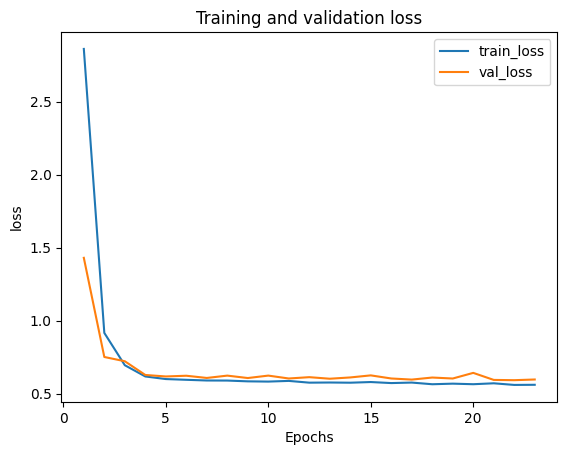

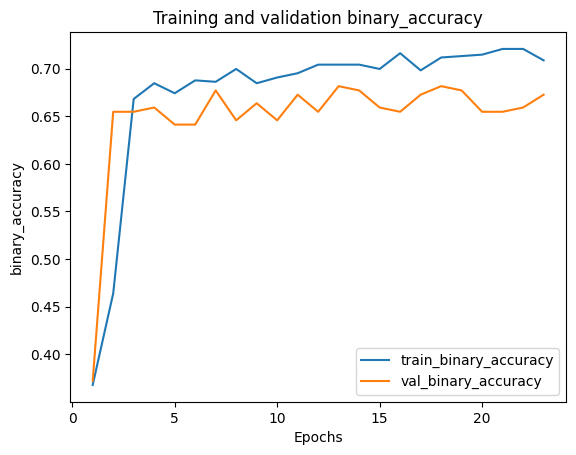

CPU times: total: 516 ms
Wall time: 3.41 s


In [82]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=10, mode='max', min_delta=0.0001)

history = model.fit(features_train, target_train, verbose=2, batch_size=32, epochs=1000, 
    validation_data=(features_test, target_test), callbacks=[callback])

visuall(history, 'loss')
visuall(history, 'binary_accuracy')

In [35]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])